# **ML-2. Обучение с учителем: регрессия**

# 1. Введение

✍В этом модуле мы начинаем знакомство с моделями машинного обучения. Как вы уже знаете, существует множество алгоритмов, позволяющих решать различные прикладные задачи.

В первую очередь класс модели определяется категорией обучения. В этом модуле мы поговорим о тех алгоритмах, которые относятся к категории обучения с учителем, а именно — к задаче регрессии.

![](https://lms.skillfactory.ru/assets/courseware/v1/2c3b5a00129b4dbedff6ed9fd2995cdb/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml1-3_2.png)

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

* Линейные модели: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
* «Древесные» модели: дерево решений и производные от него. 
* Метрические алгоритмы: метод ближайших соседей и производные от него.
* Байесовские методы: метод наивного Байеса и производные от него.
* Ансамблевые методы: композиции из методов (бэггинг, стекинг, бустинг).

В этом модуле мы поговорим о линейных моделях (но на самом деле ими не ограничимся), которые позволяют решать задачу регрессии.

> **Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

![](https://lms.skillfactory.ru/assets/courseware/v1/a9936e92fb1b93f7dd5515bb546fbdcc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-1_1.png)

На данном графике мы видим зависимость цены товара от его размера. Из диаграммы рассеяния видно, что в среднем точки расположены на одной прямой линии. То есть зависимость линейная.

Подкласс линейных моделей в свою очередь содержит множество конкретных моделей. В библиотеке sklearn, которую мы будем использовать, все линейные алгоритмы содержатся в модуле [linear_model](https://scikit-learn.ru/1-1-linear-models/). 

### ЦЕЛИ ДАННОГО МОДУЛЯ:

1. Познакомиться с принципами работы модели линейной регрессии для решения задачи регрессии.
2. Рассмотреть аналитическое (метод наименьших квадратов) и численное (градиентный спуск) решение задачи поиска параметров модели.
3. Познакомиться с метриками регрессии.
4. Изучить понятия bias и variance и понять причины недообучения и переобучения линейной регрессии.
5. Рассмотреть полиномиальную регрессию как метод усложнения модели.
6. Познакомиться с регуляризацией и рассмотреть её основные методы.
7. Научиться решать задачи регрессии.

# 2. Линейная регрессия: аналитическое решение

✍ Для начала давайте вспомним, что такое задача регрессии в машинном обучении.

> **Регрессия** — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.

![](https://lms.skillfactory.ru/assets/courseware/v1/7feb9c1039cfe25f8efb02994733047f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml1-3_5.png)

**Цель обучения** — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Когда зависимость принимается линейной, такая модель называется **линейной регрессией**.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

> **Линейная регрессия (Linear Regression)** — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

Общий вид модели в случае, когда целевая переменная зависит от  факторов, будет иметь следующий вид:

$$\hat{y} = w_{0} + w_{1}x_{0} + w_{2}x_{2} + ... + w_{m}x_{m}$$

Давайте разбираться, что в этом выражении значит каждая из переменных. Начнём с простого — с двумерного случая.

### 2D-СЛУЧАЙ

Для начала поговорим о самом простом случае, когда у нас есть один фактор и зависящий от него целевой признак. Геометрически такая зависимость представляет собой координатную плоскость, где мы отмечаем точки по оси x и соответствующие им точки на оси y.

Рассмотрим задачу из нефтяной отрасли. Есть набор данных, где представлены данные о средней пористости скважин (в процентах) и добыче газа на этих скважинах в сутки (в миллионах кубических футов). 

Нам бы хотелось построить модель, которая опишет зависимость и позволит по известной пористости скважин предсказывать неизвестную выработку газа.

Зависимость целевого признака от фактора представлена на диаграмме рассеяния (см. ниже). Пористость скважины отложена по оси абсцисс — Porosity (%), а добыча газа — по оси ординат, Gas production (Mcf/day).

![](https://lms.skillfactory.ru/assets/courseware/v1/5aac4f0c35432b4d259b26227fe41e59/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_1.png)

Из диаграммы отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

Идея! Давайте проведём через точки прямую линию так, чтобы она максимально хорошо описывала зависимость.

Для этого сначала вспомним уравнение прямой из школьного курса математики:

$$y=kx+b$$

где:

* $x$ — это некоторый фактор, от которого зависит целевая переменная $y$. В нашем случае, $x$ — это пористость скважины, а $y$ — добыча газа.
* $k$ — коэффициент наклона прямой (тангенс угла наклона). Если $k>0$, это означает, что угол наклона прямой острый и прямая возрастает. Если $k<0$, угол наклона тупой и прямая убывает.
* $b$ — коэффициент смещения прямой по оси $y$. Он будет соответствовать значению $y$ при $x=0$. То есть это точка пересечения прямой и оси Y.

![](https://lms.skillfactory.ru/assets/courseware/v1/efff3f61af4a7ba5499bb204d8c61aeb/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_2.png)

На данном графике изображены две прямые с разными коэффициентами наклона. Зелёная прямая соответствует положительному значению $k_1>0$, и геометрически $k_1$ равен тангенсу острого угла $\alpha_1$ наклона прямой по отношению к оси x: $k_1=tg(\alpha_1)$. Синяя прямая соответствует отрицательному значению $k_2<0$, и геометрически $k_2$ равен тангенсу тупого угла $\alpha_2$ наклона прямой по отношению к оси x: $k_2=tg(\alpha_2)$. Каждая из прямых пересекается с осью y в точках $b_1$ и $b_2$ — это и есть **коэффициент смещения прямых**.

Это уравнение и есть двумерная модель линейной регрессии. Зная коэффициенты $k$ и $b$, мы можем подставить в него любую пористость скважины x и получить предсказание добычи газа y.

Однако в машинном обучении приняты немного другие обозначения. Фактическое значение целевой переменной обозначается как $y$, а вот предсказанное моделью — $\hat{y}$. Также для удобства коэффициенты $k$ и $b$ приведём к единому обозначению: $w_0=b$ и $w_1=k$. Тогда уравнение модели линейной регрессии запишется в виде:

$$\hat{y} = w_{0} + w_{1}x$$

**Примечание**. Коэффициенты $w_0$ и $w_2$ называются **параметрами линейной регрессии**.

Остаётся только один вопрос: откуда, собственно, взять параметры $w_0$ и $w_1$? Обсудим этот вопрос чуть позже.

А пока представим, что параметры мы нашли. В таком случае можно построить прямую, которая опишет нашу зависимость. Пусть коэффициенты составляют (мы их нашли сами по методу наименьших квадратов, о котором поговорим ниже):

$$w_{0} = -2.94$$ 
$$w_{1} = 287.7$$

Тогда модель будет иметь следующий вид:

$$\hat{y} = 287.7x - 2.94$$

Если подставлять значения конкретные значения пористости $x$ в модель, можно построить прямую, которая описывает исходную зависимость. Это и будет графическая интерпретация нашей модели:

![](https://lms.skillfactory.ru/assets/courseware/v1/68be2a900a484a12681d3e6d5be5fc3b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_3.png)

## 3D-СЛУЧАЙ

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: $x_1$ — пористость и $x_2$ — хрупкость.

Можно отобразить такую зависимость добычи газа от этих факторов в трёхмерном пространстве в виде диаграммы рассеяния:

![](https://lms.skillfactory.ru/assets/courseware/v1/241e1620934df4bea3c70cd4d37ac1d7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_4.png)

В таком случае в выражение для модели добавится ещё одна переменная $x_2$ и соответствующий ей коэффициент $w_2$:

Опять же, представим, что параметры модели мы нашли и они равны:

$$w_{0} = -2003$$
$$w_{1} = 302.3$$
$$w_{2} = 31.38$$

Тогда модель будет иметь следующий вид:

$$\hat{y} = 302.3x_{1} + 31.38x_{2} - 2003$$

Это была алгебра — теперь перейдём к геометрии. Геометрически данное уравнение описывает плоскость в трёхмерном пространстве с осями $x_1$ и $x_2$, $w_0$ — смещение плоскости по вертикальной оси, а коэффициенты $w_1$ и $w_2$ — коэффициенты наклона этой плоскости к осям $x_1 и $x_2$. 

То это это будет плоскость, которая подстроена под точки в трёхмерном пространстве:

![](https://lms.skillfactory.ru/assets/courseware/v1/5e86dbff46a7bda35c15bf2c88738e67/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_5.png)

## ОБЩИЙ СЛУЧАЙ

А что если факторов не два, а больше: 3, 15, 100? Тут-то мы и приходим к общему виду модели линейной регрессии, который вводили в самом начале. Пусть у нас есть $m$ факторов $\left \{ x_{1}, x_{2}, ..., x_{m} \right \}$, от которых зависит целевая переменная .

В геометрическом смысле данное уравнение описывает плоскость в $(m+1)$-мерном пространстве ($m$ факторов + $1$ целевой признак отложены по осям координат). Такую плоскость называют гиперплоскостью.

Абстрактное $(m+1)$-мерное пространство, конечно же, невозможно отобразить графически и сложно даже представить, как оно выглядит. Но нам это и не нужно. Все операции в таком пространстве аналогичны операциям в двумерном или трёхмерном пространстве.

→ Для понимания принципа работы мы будем рассматривать только прямую в двумерном пространстве, а результат уже обобщать на случай с большей размерностью.

Стоит отметить, что в DS мы, как правило, работаем с большим количеством факторов (больше двух), которые описывают данные, поэтому отобразить модель в геометрическом пространстве не получится, но важно понимать, что представляет собой сама модель.

## ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

Теперь мы знаем, как выглядит модель линейной регрессии в общем случае: это простое линейное выражение, подставляя в которое значения факторов, можно найти целевую переменную. Это линейное выражение соответствует прямой, плоскости или гиперплоскости в зависимости от количества признаков.

Остаётся вопрос: **откуда взять коэффициенты, которые стоят при $x$**?

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

![](https://lms.skillfactory.ru/assets/courseware/v1/6540d6365f43f4ee183feaa68b9a46c2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_6.png)

Какие параметры будут наилучшими?

Для ответа на этот вопрос давайте вспомним схему обучения моделей машинного обучения по принципу минимизации эмпирического риска, которую мы рассматривали в предыдущем модуле:

![](https://lms.skillfactory.ru/assets/courseware/v1/5fac5fe11d423f674949523e3db643c9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml1-2_1.png)

Согласно данной схеме обучения, поиск параметров производится путём минимизации некоторой функции ошибки. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных.

Осталось только понять: где взять эту функцию ошибки? Ответ кроется в картинке ниже. Давайте представим, как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

![](https://lms.skillfactory.ru/assets/courseware/v1/5fec239cc84df5a5cd29cab48650641d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-2_7.png)

> Что вообще есть ошибка? В самом простом понимании это расхождение между истиной и предсказанием.

Чтобы не учитывать знак расхождения, можно взять модуль разницы между истинным значением и предсказанным (тем, что лежит на прямой). Рассчитать ошибки   (на рисунке они отмечены красными отрезками) для всех пяти точек можно следующим образом:

$$e_{i} = \left | y_{i} - \hat{y_{i}} \right |,$$

где $y_i$ — это результат подстановки $i$-ого значения  в модель линейной регрессии.

Вычислим среднее по всем ошибкам. Такая ошибка называется **средняя абсолютная ошибка (Mean Absolute Error, MAE)** и записывается следующим образом (в двумерном случае):

$$M A E=\frac{\sum_{i=1}^{n} e_{i}}{n} = \frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}=\frac{\sum_{i=1}^{n}\left|y_{i}-w_{0}-w_{1} x_{i}\right|}{n}$$

Осталось только найти такие  и , при которых MAE была бы минимальной. В математике это записывается следующим образом:

$$M A E=\frac{\sum_{i=1}^{n} e_{i}}{n} = \frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}=\frac{\sum_{i=1}^{n}\left|y_{i}-w_{0}-w_{1} x_{i}\right|}{n} \rightarrow \min _{w}$$

→ Тут-то математики и столкнулись с проблемой. Оказывается, если пытаться решить эту оптимизационную задачу классическими способами (через условия [экстремума функции](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D1%82%D1%80%D0%B5%D0%BC%D1%83%D0%BC)), то поиск решения будет противоречить основным законам математического анализа. Почему? Обсудим это в модулях по математике, когда будем решать оптимизационные задачи.

ОТВЕТ ДЛЯ ЛЮБОЗНАТЕЛЬНЫХ

Функция модуля является недифференцируемой в точке 0, то есть не имеет производной. Классическая оптимизационная задача решается через равенство производной функции нулю. Поиск производной может обернуться математическим противоречием.

Проблему с MAE можно решить, но всё же она используется гораздо реже.

Но математикам, конечно, удалось найти выход. Вместо модуля можно использовать квадрат — он тоже убирает знак ошибки и по сути аналогичен модулю. Получим **среднеквадратичную ошибку (Mean Square Error, MSE)**:

$$M S E=\frac{\sum_{i=1}^{n} e_{i}^2}{n} = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n}=\frac{\sum_{i=1}^{n}(y_{i}-w_{0}-w_{1} x_{i})^2}{n}$$

Это и будет наша функция ошибки, которую мы будем минимизировать, управляя параметрами  и :

$$M S E=\frac{\sum_{i=1}^{n} e_{i}^2}{n} = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n}=\frac{\sum_{i=1}^{n}(y_{i}-w_{0}-w_{1} x_{i})^2}{n} \rightarrow \min _{w}$$

**Примечание**. В общем случае, когда X — это таблица из  наблюдений и  признаков, постановка задачи оптимизации MSE выглядит следующим образом:

$$M S E=\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n}=\frac{\sum_{i=1}^{n}(y_{i}-w_{0}-\sum_{j=1}^{m}w_{j}x_{ij})^2}{n} \rightarrow \min _{w},$$

где $x_{ij}$ — это значение, которое находится в $i$-ой строке и $j$-ом столбце таблицы наблюдений.

Математике известно решение данной задачи оптимизации. Метод поиска параметров линейной регрессии называется **методом наименьших квадратов** (сокращённо — **МНК**) и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру *OLS (Ordinary Least Squares)*.

→ Решать саму задачу поиска минимума функции мы сейчас не будем, так как пока что не владеем достаточными для её решения знаниями о частной производной и условиях экстремума функции многих переменных, но приведём финальный ответ, полученный для общего случая.

Итак, пусть у нас есть матрица X, в которой по строкам собрано  наблюдений, а по столбцам отложено  факторов — по сути, это обычный, привычный нам DataFrame. К каждому примеру из таблицы X есть ответ y.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

$$\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{m}x_{m} = \bar{w} \cdot \bar{x}$$

$\bar{w} = (w_{0}, w_{1}, w_{2}, ..., w_{m})$ — вектор параметров

$\bar{w} = (w_{0}, w_{1}, w_{2}, ..., w_{m})$ — вектор ризнаков

Мы хотим найти наилучшую оценку для $w_{0}, w_{1}, w_{2}, ..., w_{m}$.

**Примечание**. Для того чтобы конечная запись формулы была короче и можно было включить в вектор  коэффициент смещения прямой , в матрицу X первым добавляют столбец, полностью состоящий из единиц. Это связано со спецификой матричного умножения, о котором мы поговорим далее в курсе.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

$$\bar{w} = (X^{T}X)^{-1} X^{T}y = QX^{T}y$$

Данная матричная формула позволяет найти неизвестные параметры линейной регрессии в виде вектора $w=(w_{0}, w_{1}, w_{2}, ..., w_{m})$. Найденные коэффициенты называют решением задачи линейной регрессии.

**Примечание**. Верхний индекс T у матрицы X означает **транспонирование матриц** — смену строк и столбцов местами (поворот таблицы). Пример:

$$\begin{pmatrix} -2 & 3 & 1 \\ 0 & -1 & -3 \end{pmatrix} = \begin{pmatrix} -2 & 0\\ 3 & -1\\ 1 & -3 \end{pmatrix}$$

> Операция возведения матриц в степень -1 называется **обращением матриц**. Полученная в результате матрица называется **обратной** к исходной. Так, матрица $(X^TX)^{-1}$ является обратной к матрице $X^TX$.

Саму процедуру обращения матриц мы будем рассматривать в модуле по линейной алгебре. Сейчас же для проведения этой операции мы будем использовать библиотеку *numpy*, которая позволяет очень быстро и просто обращать матрицы.

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY

Перейдём к практической части. Давайте научимся строить аналитическое решение линейной регрессии по МНК в Python.

Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

1. Загрузить данные и проанализировать датасет на предмет пропусков.
2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
4. Оценить качество модели.

Для начала импортируем необходимые вспомогательные библиотеки:



In [50]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

Будем работать с датасетом из библиотеки sklearn о домах в Бостоне. Этот набор данных содержит информацию, собранную службой переписи населения США и касающуюся жилья в районе Бостона, штат Массачусетс.

Данный датасет содержится в модуле datasets библиотеки sklearn. Давайте загрузим датасет с помощью функции load_boston() и выведем его описание, обратившись по ключу 'DESCR':

In [51]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

В данном описании говорится, что у нас есть 506 участков с жилыми домами, которые описываются 13-ю признаками. На каждом из участков находится несколько домов. Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

Задача — научить модель предсказывать медианную стоимость дома на участке.

Краткое описание признаков набора данных

* CRIM — уровень преступности на душу населения по городам.;
* ZN — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
* INDUS — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
* CHAS —фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
* NOX —концентрация оксидов азота (в десятимиллионных долях);
* RM —среднее количество комнат в доме;
* AGE —доля зданий, построенных до 1940 г. и занимаемых владельцами;
* DIS — взвешенные расстояния до пяти бостонских центров занятости;
* RAD — индекс доступности радиальных автомобильных дорог;
* TAX — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
* PTRATIO — соотношение учеников и учителей по городам;
B — 1000 (Bk — 0.63) , где Bk — доля граждан афроамериканского происхождения по городам;
* LSTAT — процент населения с низким статусом;
* MEDV — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Составим DataFrame из наших данных. Для этого обратимся по ключу 'data' к загруженным данным и получим numpy-массив, в котором содержится информация обо всех признаках, а по ключу 'feature_names' содержатся названия признаков. Обратившись по ключу 'target', можно получить numpy-вектор со значениями целевой переменной — медианной стоимости занимаемых домов (MEDV).

In [52]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Выведем информацию о таблице boston_data с помощью метода info():



In [53]:
boston_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Примечание**. Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Поэтому если в ваших данных окажутся пропуски, обязательно заранее позаботьтесь о них (способы мы изучали в модуле по очистке данных).

Итак, в наших данных нет пропусков, а значит их можно подавать в модель, чтобы обучить её предсказывать целевой признак (признак MEDV).

Также модель не умеет работать с категориальными признаками, представленными в виде типа object. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

→ Давайте начнём с простого. Построим линейную регрессию на одном признаке. Выберем признак, который имеет наиболее высокую линейную взаимосвязь. Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

**Примечание**. Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, поэтому нагляднее будет воспользоваться столбчатой диаграммой.

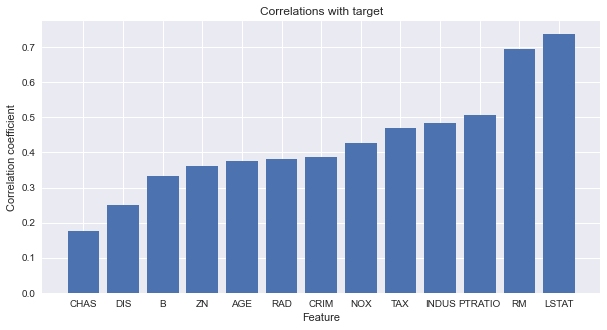

In [54]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

**Примечание**. Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

$$\bar{w} = (X^{T}X)^{-1} X^{T}y = QX^{T}y$$

Что есть $X$ и $y$? Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. У нас матрица $X$ — это таблица, состоящая из одного столбца (LSTAT), а $y$ — столбец с медианными ценами (MEDV):


In [55]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


Примечание. Двойные квадратные скобки ```boston_data[['LSTAT']]``` позволяют выбрать признак из DataFrame, сохранив его в виде таблицы. Это важно, так как в формуле МНК $X$ — это матрица.

У нас есть все компоненты формулы, чтобы найти параметры модели. Давайте напишем функцию linear_regression(), в которой реализуем вычисления коэффициентов. Аргументами функции будут матрица наблюдений X и вектор ответов y, а возвращать она будет вектор параметров w.

Матричные вычисления легче всего реализовать через библиотеку numpy.

Для начала вспомним, что для вычисления свободного члена $w_0$ необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции ones() из библиотеки numpy, а присоединить его к таблице X поможет функция column_stack().

Матричное умножение в numpy реализуется с помощью оператора @. Транспонирование осуществляется через .T, а обратная матрица вычисляется с помощью функции inv() из модуля linalg (модуля для линейной алгебры).

In [56]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

Осталось только вызвать нашу функцию и передать в неё нашу таблицу примеров X и столбец правильных ответов y. Вычислим вектор параметров и выведем его на экран:

In [57]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

$$w_{0} = 34.55$$
$$w_{1} = -0.95$$

А значит сама модель будет иметь вид:

$$\hat{y} = 34.55 - 0.95x_{1}$$

Самое приятное в модели линейной регрессии — то, что её коэффициенты можно проинтерпретировать. 

Коэффициент $w_0=34.55$ имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент $w_1=-0.95$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [58]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
# Predicted value: 29.63

Predicted value: 29.63


Так как мы работаем с одним фактором, то можем построить визуализацию нашей модели.

Давайте напишем функцию plot_regression_2d(), у которой будет три обязательных аргумента (матрица наблюдений X, столбец правильных ответов y и столбец с предсказаниями модели y_pred) и два аргумента по умолчанию (xlabel — подпись оси абсцисс и ylabel — подпись оси ординат).

In [59]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

Сделаем предсказание для всех объектов из таблицы X, подставив её в модель линейной регрессии с найденными параметрами, и построим график:

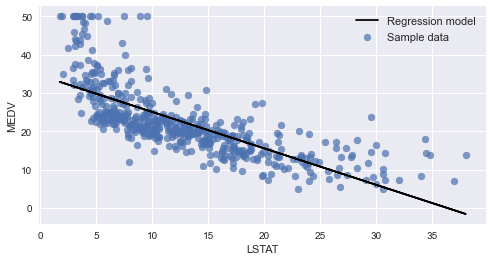

In [60]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Как и ожидалось, прямая является убывающей (коэффициент $w_{1}<0$), и, если её продолжить влево, она пересечётся с осью ординат в точке $w_{0}=34.55$. 

Итак, мы воспользовались формулой для МНК алгоритма и нашли параметры модели линейной регрессии «вручную», реализовав формулу в виде функции. Отметим, что наша функция универсальна: в неё можно подавать не только матрицу $X$ с одним признаком (LSTAT), но и таблицу, содержащую все признаки, описывающие участки.

Конечно же, никто не строит линейную регрессию «руками», используя формулу МНК. Все дата-сайентисты пользуются библиотеками, такими как sklearn. Давайте посмотрим на реализацию ↓

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN

Алгоритм построения модели реализован в библиотеке машинного обучения sklearn и находится в модуле linear_model. Давайте импортируем этот модуль:

In [61]:
from sklearn import linear_model


В модуле находится класс [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), который реализует аналитическое решение линейной регрессии. Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Данный метод реализует формулу метода наименьших квадратов и рассчитает параметры модели самостоятельно. Чтобы получить свободный член $w_0$ нужно обратиться по атрибуту intercept_, а вектор параметров $w_{1}, w_{2}, ..., w_{m}$ будет храниться в атрибуте coef_ (так как у нас один фактор в матрице X, то и коэффициент будет только один):

In [62]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0: 34.5538408793831
w1: [-0.95004935]


Примечание. Обратите внимание, что мы получили ровно те же самые значения для параметров модели, что является вполне ожидаемым, ведь метод fit() у объекта *LinearRegression* реализует ту же самую формулу МНК, которую мы прописали в функции linear_regression(). Интерпретация коэффициентов остаётся той же.

Модель обучена. А как сделать предсказание? Вручную записывать выражение для модели и подставлять коэффициенты? Конечно же, нет. Для этого есть метод predict(). В него необходимо передать матрицу наблюдений, для которых нужно сделать предсказание.

Давайте сделаем предсказание для всех наших наблюдений из таблицы X и визуализируем результат с помощью нашей функции plot_regression_2d():

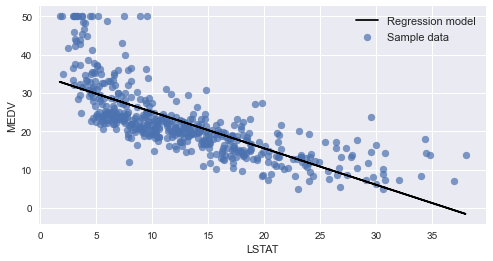

In [63]:
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Получаем тот же самый график, что мы видели ранее, когда реализовывали линейную регрессию вручную.

А что, если мы хотим построить линейную регрессию, используя всю предоставленную информацию, то есть все 13 признаков? Не проблема! Нужно только расширить матрицу наблюдений $X$, добавив в неё остальные признаки и снова обучить модель LinearRegression.

Давайте выберем из таблицы boston все столбцы, исключая столбец с целевой переменной (MEDV). Полученную матрицу X и вектор правильных ответов y отправляем в метод fit(), чтобы произвести подгонку и найти параметры модели.

In [64]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

Для удобства составим DataFrame из коэффициентов $w_{1}, w_{2}, ..., w_{13}$ обученной модели, не забыв добавить к нему строку со свободным членом $w_0$:

In [65]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы получили таблицу с признаками из нашего набора данных и коэффициентами, которые им соответствуют.

Каждый из коэффициентов в модели показывает, на сколько в среднем (согласно модели) изменится медианная цена (в тысячах долларов) при увеличении параметра на единицу. Например, если уровень преступности увеличится на один пункт, то медианная цена зданий на участке упадёт на 0.1 тыс. долларов. А вот увеличение среднего количества комнат на участке (RM) на одну единицу повысит медианную цену на 3.8 тыс. долларов.

→ Свободный член (INTERCEPT) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

Итак, мы с вами построили две модели линейной регрессии: lr_lstat на одном признаке (LSTAT) и lr_full — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

$$error_{i} = y_{i} - \hat{y_{i}}$$

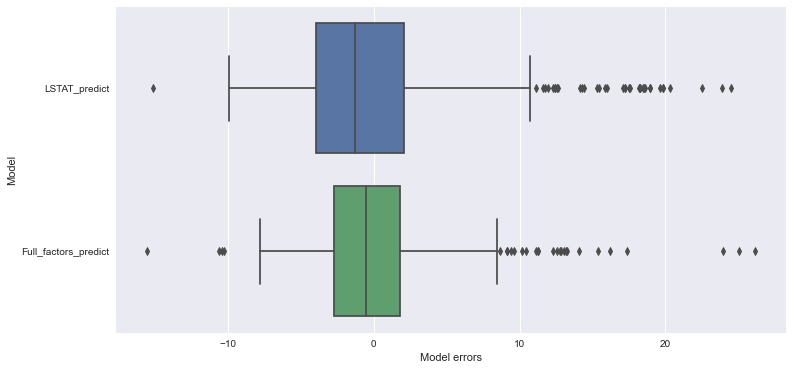

In [66]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. О том, как справиться с этой проблемой, мы поговорим чуть позже.

Визуализация — это, конечно, хорошо, но, согласитесь, не очень удобно: визуализация не даёт конкретики — только общие представления об ошибках.

Может быть, есть способ описать качество модели каким-то конкретным числом? Да. Этот показатель называется метрикой. 

✍ О метриках регрессии мы поговорим в следующем юните.

In [67]:
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))
# Predicted value: 29.63

Predicted value: 29.63


### Задание 2.7

В ваших данных появился новый участок со следующими параметрами:

CRIM         0.35114  
ZN           0.00000  
INDUS        7.38000  
CHAS         0.00000  
NOX          0.49300  
RM           6.04100  
AGE         49.90000  
DIS          4.72110  
RAD          5.00000  
TAX        287.00000  
PTRATIO     19.60000  
B          396.90000  
LSTAT        7.70000  

Сделайте предсказание медианной стоимости (MEDV) для данного участка c помощью модели lr_full. Введите результат предсказания в тысячах долларов. Ответ округлите до второго знака после точки-разделителя.

In [68]:
new = pd.DataFrame({
    'CRIM': [0.35114], 
    'ZN': [0.0], 
    'INDUS': [7.38],
    'CHAS': [0.0], 
    'NOX': [0.493], 
    'RM': [6.041],
    'AGE': [49.9], 
    'DIS': [4.7211], 
    'RAD': [5.0],
    'TAX': [287.0], 
    'PTRATIO': [19.6], 
    'B': [396.9],
    'LSTAT': [7.7]
    })

print(np.round(lr_full.predict(new), 2))

[22.87]


### Задание 2.8

Дан [набор данных]() о стартапах и их прибыли (в долларах) в трёх различных штатах США.
Столбцы:

* R&D Spend — расходы на исследования.  
* Administration — административные расходы.  
* Marketing Spend — расходы на маркетинг.  
* State — штат.  
* Profit — прибыль (**целевой признак**).  

Для обучения линейной регрессии используйте R&D Spend, Administration и Marketing Spend. Отделите факторы от целевой переменной.

Обучите модель линейной регрессии методом наименьших квадратов с помощью библиотеки numpy (воспользуйтесь формулой из модуля).

Чему равны коэффициенты линейной регрессии при признаках R&D Spend, Administration и Marketing Spend? Ответ введите с точностью до второго знака после точки-разделителя.

In [69]:
startups = pd.read_csv('data/50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [70]:
profit = startups[['Profit']]
startups = startups.drop(labels=['State', 'Profit'], axis=1)
display(startups.head())
display(profit.head())

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [71]:
#Составляем список факторов (исключили целевой столбец)
features = startups.columns
#Составляем матрицу наблюдений X и вектор ответов y
X = startups[features]
y = profit['Profit']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [72]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,R&D Spend,0.805715
1,Administration,-0.026816
2,Marketing Spend,0.027228
3,INTERCEPT,50122.192990


# 3. Метрики регрессии. Недостатки аналитического решения

✍ Итак, ранее мы с вами пришли к тому, что нам необходимо научиться оценивать качество модели с помощью какого-то показателя (или нескольких показателей). Такой показатель в машинном обучении называется метрикой. И для каждого класса задач машинного обучения существуют свои метрики.

Метрика — это численное выражение качества моделирования.

Для оценки качества решения задачи регрессии существует множество метрик. Давайте рассмотрим самые основные и часто используемые.

МЕТРИКИ РЕГРЕССИИ

Будем рассматривать метрики для задачи регрессии на следующем примере. Возьмём первые пять наблюдений из нашей таблицы и предсказанные для них моделью lr_full ответы:

$$y=(24.0, \ 21.6, \ 34.7, \ 33.4, \ 36.2)$$

$$\hat{y}=(29.82, \ 25.87, \ 30.73, \ 31.76, \ 29.49)$$

На этих значениях мы будем рассматривать следующие метрики:

### 1. Средняя абсолютная ошибка — MAE (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

$$MAE = \frac{\sum_{i=1}^{n}\left | y_{i} - \hat{y_{i}} \right |}{n}$$

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

$$MAE = \frac{\left | 24.0-29.82 \right |+\left | 21.6-25.87 \right |+\left | 4.7-30.73 \right |+\left | 33.4-31.76 \right |+\left | 36.2-29.49 \right |}{5} = 4.482 \left [ тыс. \$ \right ]$$

То есть для нашего примера из пяти наблюдений в среднем модель ошибается на 4.482 тысячи долларов.

Много ли это? Хороший вопрос, на который без эксперта-оценщика недвижимости будет сложно дать ответ. Однако можно попробовать посчитать ошибку в процентах, ведь в процентах всё воспринимается легче, и для этого нам пригодится следующая метрика — MAPE.

### 2. Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

$$MAPE = \sum_{i=1}^{n} \frac{\left | y_{i} - \hat{y_{i}} \right |}{\left | y_{i} \right |} \frac{100\%}{n}$$

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

Например, средняя ошибка — 2 тысячи долларов. Это много или мало? Смотря для чего... А вот средняя ошибка, равная 80 % — это много или мало? Определённо много.

$$M A P E=\left(\frac{|24.0-29.82|}{|24.0|}+\frac{|21.6-25.87|}{|21.6|}+\frac{|34.7-30.73|}{|34.7|}+\frac{|33.4-31.76|}{|33.4|}+\frac{|36.2-29.49|}{|36.2|}\right) \frac{100 \%}{5}=15.781 \%$$

Таким образом, на первых пяти наблюдениях модель в среднем ошибается на 15.781 %. Это довольно неплохой результат.

### 3. Средняя квадратическая ошибка — MSE

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики.

Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

$$MSE = \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{n}$$

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна.

$$M S E=\frac{(24.0-29.82)^{2}+(21.6-25.87)^{2}+(34.7-30.73)^{2}+(33.4-31.76)^{2}+(36.2-29.49)^{2}}{5}=22.116\left[(\text { тыс. } \$)^{2}\right]$$

Таким образом, для нашего примера квадрат отклонения составляет 22.116 тысяч долларов в квадрате.

Согласитесь, не очень понятно, о чём идет речь. Однако данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.

**Что значит «штрафовать»?** 

Например, расхождение в 200 единиц в метрике MSE воспринимается как $200^2$, а в метрике MAE это расхождение воспринимается как 200. Поэтому, если у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики MSE, и нам легче сравнить модели между собой.

Но в то же время это и проклятие MSE. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — 30 тысяч долларов, а в наборе данных ему соответствует цена в 3 миллиона долларов, то при возведении такой ошибки в квадрат получится 9 миллионов, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

### 4. Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения RMSE надо просто извлечь квадратный корень из MSE:

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{n}}$$

Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.

$$RMSE = \sqrt{22.116} = 4.702 \left [ тыс. \$ \right ]$$

Преимущества и недостатки этой метрики такие же, как и у MSE, к преимуществам добавляется только понятная размерность.

### 5. Коэффициент детерминации ($R^2$)

Все рассматриваемые ранее метрики имели масштаб от 0 до +∞. Чем это плохо?

А что если нам скажут, что MSE для модели составляет 32? Должны ли мы улучшить модель, или она достаточно хороша? А что если MSE = 0.4?

На самом деле, трудно понять, хороша модель или нет, не сравнив её показатели с теми же показателями других моделей.

Коэффициент детерминации, или $R^2$, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с MSE, но его преимущество в том, что $R^2$ всегда находится в промежутке между -∞ и 1.

$$R^{2} = 1 - \frac{MSE}{MSE_{mean}},$$

где

$$MSE_{mean} = \frac{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}{n},$$

где $\bar{y}$ — среднее по вектору правильных ответов.

То есть $R^2$ показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Посмотрим, как считается $R^2$. Сначала рассчитаем среднее по правильным ответам:

$$\bar{y} = \frac{24.0+21.6+34.7+33.4+36.2}{5} = 29.98$$

Теперь рассчитаем $MSE_{mean}$:

$$M S E_{\text {mean }}=\frac{(24.0-29.98)^{2}+(21.6-29.98)^{2}+(34.7-29.98)^{2}+(33.4-29.98)^{2}+(36.2-29.98)^{2}}{5}=35.72$$

И, наконец, сам $R^2$:

$$R^{2} = 1 - \frac{22.116}{35.72} = 0.38$$

Есть ещё одна интерпретация данной метрики. Статистически показатель $R^2$ описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным  считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения $R^2$ говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.

Давайте обобщим всё вышесказанное в виде таблицы:

![](pics/1.png)

## РАСЧЁТ МЕТРИК НА PYTHON

Настало время проверить качество построенных нами ранее моделей линейной регрессии: lr_lstat и lr_full.

Весь набор функций для вычисления метрик в *sklearn* находится в модуле [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Давайте его импортируем:

In [73]:
from sklearn import metrics

Функции, которые нам понадобятся:

* mean_absolute_error() — расчёт MAE;
* mean_square_error() — расчёт MSE;
* mean_absolute_percentage_error() — расчёт MAPE;
* r2_score() — расчёт коэффициента детерминации $R^2$.

В каждую из функций достаточно передать правильные ответы и предсказания, и функция вернёт рассчитанную метрику.

Примечание. Для расчёта метрики RMSE нет специальной функции, однако мы знаем, что для её расчёта достаточно извлечь квадратный корень из MSE.

Из-за особенностей реализации функция ```mean_absolute_percentage_error()``` возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

Давайте вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели lr_lstat: сделаем предсказание на основании признака LSTAT и передадим истинные и предсказанные медианные цены в функции для расчёта метрик:

In [74]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

LinearRegression()

In [75]:
#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))
 
 
# MAE score: 4.505 thou. $
# RMSE score: 6.203 thou. $
# MAPE score: 21.352 %
# R2 score: 0.544

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


Проделываем ту же самую операцию для второй модели линейной регрессии, lr_full:



In [76]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))
 

# MAE score: 3.271 thou. $
# RMSE score: 4.679 thou. $
# MAPE score: 16.417 %
# R2 score: 0.741

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


Сравним полученные результаты:

* ***MAE***: в среднем первая модель ошибается на  4.505 тыс. долларов, а вторая — на 3.271 тыс. долларов.
* ***RMSE***: среднеквадратичное отклонение первой модели от истинных ответов составляет 6.203 тыс. долларов, а второй — 4.679.
* ***MAPE***: первая модель ошибается на 21.352 %, а вторая — на 16.417 %.
* ***$R^2$***: доля объясняемой информации (дисперсии), которую улавливает первая модель, — 0.544, а вторая — 0.741.

Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

### Задание 3.2

У вас есть истинные ответы y_true = [1.23, 2.35, 2.75] и предсказания модели y_pred = [1.01, 12.3, 2.74]. Посчитайте метрику RMSE, ответ округлите до двух знаков после точки-разделителя.

In [77]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

round(np.sqrt(metrics.mean_squared_error(y_true, y_pred)), 2)

5.75

### Задание 3.3

Чему равен коэффициент детерминации на следующих данных?
Истинные ответы: y_true = [22.4, 20.6, 23.9, 22.0, 11.9]

Предсказанные ответы: y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

Ответ округлите до двух знаков после точки-разделителя.

In [78]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

round(metrics.r2_score(y_true, y_pred),2)


0.71

## НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

Ранее мы с вами рассмотрели, что такое модель линейной регрессии, и научились рассчитывать её параметры с помощью аналитического подхода — метода наименьших квадратов.

$$\bar{w}=\left(X^{T} X\right)^{-1} X^{T} y=Q X^{T} y$$

Метод наименьших квадратов позволяет очень просто получить коэффициенты , подставив таблицу в формулу. Вот, собственно, и всё «обучение». 

→ Существует [теорема Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. Мы ещё вернемся к этой теореме, когда будем говорить об МНК в модулях по линейной алгебре.

Казалось бы, относительно простая математика: надо всего лишь перемножить матрицы между собой и получить ответ. Особенно простой эта задача должна быть для компьютера. Но нам так кажется, поскольку мы ранее не сталкивались с матричным умножением и будем говорить о нём только в модулях по линейной алгебре.

Оказывается, у такого простого подхода есть один большой минус — это работа с большим количеством признаков.

Давайте внимательно посмотрим на операцию обращения матриц (возведение в степень -1):

$$Q = (X^{T}X)^{-1}$$

Таблица $X$ имеет размер $n,m$, то есть у неё $n$ строк и $m$ столбцов. Таблица $X^T$ — это результат транспонирования матриц (замены строк и столбцов местами), то есть её размерность — $(m,n)$. Забегая вперёд, отметим, что по правилам умножения матриц результат умножения будет иметь размерность $(m,n)x(n,m)=(m,m)$, где $m$ — это число столбцов.

А теперь представим, что у нас не 13 признаков, а 1300. То есть матрица $Q$ имеет размерность $(m,m)=(1300,1300)$. Но мы делаем вычисления на компьютере, так ведь? Сложностей быть не должно, но... В модулях по линейной алгебре мы увидим, что обращение матриц — очень ресурсозатратная операция. У неё кубическая сложность, то есть если размер матрицы — $(m,m)$, то на её обращение понадобится $m^3$ операций. Для нашего примера это $1300^3=2197000000$!

Обращение матриц больших размеров может стать очень трудоёмким процессом при работе с большими объёмами данных.

Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.

**Что это такое?**

Представьте, что мы построили модель, но собираемся её уточнять в процессе эксплуатации. К нам приходят всё новые данные, и мы должны изменять параметры модели, подстраиваясь под новые зависимости.

Если мы используем метод fit() для модели LinearRegression и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.



Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица $Q = (X^{T}X)^{-1}$ в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы, которые мы рассмотрим далее в курсе. 

Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. 

Проблема решается с помощью регуляризации.

# 4. Линейная регрессия: численное решение

✍ Ранее мы с вами установили, что аналитическое решение линейной регрессии — метод наименьших квадратов — имеет несколько недостатков. Основной из них — большая вычислительная сложность обращения матриц.

Хотелось бы получить метод, который справляется с этим недостатком. Для этого давайте вернёмся на шаг назад и вспомним, как вообще звучит постановка задачи поиска параметров модели.

В самом простом двумерном случае мы пытаемся найти такие коэффициенты  уравнения прямой  и , чтобы средний квадрат ошибки (MSE) был минимален.

$$M S E=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n}=\frac{\sum_{i=1}^{n}\left(y_{i}-w_{0}-w_{1} x_{i}\right)^{2}}{n} \rightarrow \min _{w}$$

Гауссу удалось найти общее решение для этой оптимизационной задачи и вывести формулу метода наименьших квадратов для поиска коэффициентов.

Но можно пойти другим путём, не аналитическим (вывод формулы «в лоб»), а численным (итерационное приближение функции к минимуму).

Самым популярным численным методом оптимизации, используемым в машинном обучении, является **алгоритм градиентного спуска**.

**Градиентный спуск (Gradient descent)** — самый используемый [алгоритм](https://neurohive.io/ru/osnovy-data-science/gradient-descent/) минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

С градиентным спуском мы будем детально знакомиться в модулях по оптимизации и даже реализуем его своими руками. Сейчас же нам важно усвоить принцип работы, чтобы понимать, какими параметрами алгоритма мы можем управлять при его использовании в коде.

Начнём обзор алгоритма немного издалека.

Представим, что мы находимся на некоторой холмистой местности и нам надо добраться до самой низкой точки, но делаем мы это вслепую, то есть не знаем сам ландшафт. Назовём эту точку целью.

![](https://lms.skillfactory.ru/assets/courseware/v1/955db3eb396297eabf11b61019fb49d5/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_1.png)

Давайте опишем, как мы будем искать эту точку. Для начала необходимо задать начальную точку, из которой мы, собственно, стартуем. Далее мы двигаемся в сторону крутизны склона. Если склон круче справа, надо сделать шаг вправо, если склон круче слева, надо сделать шаг влево. Повторяем шаги до тех пор, пока не достигнем самой низкой точки.

У вас мог возникнуть вопрос: как определить, что мы достигли цели — самой низкой точки? В этой точке крутизна склона с обеих сторон равна 0 или близка к нему (ровная поверхность). Можно использовать эту информацию как точку остановки нашего алгоритма.

Описанный нами алгоритм можно перевести на язык математики. Он то и будет называться алгоритмом градиентного спуска.

Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров  нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для MSE, зависящей от одного параметра, график будет иметь вид параболы:

![](https://lms.skillfactory.ru/assets/courseware/v1/2031eae68e1cfcfbfa6642928a844ef8/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_2.png)

Если параметров не один, а два, то функция потерь будет графически представлена в виде поверхности в трёхмерном пространстве. Ниже приведён пример такой поверхности и её вид сверху в виде концентрических кругов:

![](https://lms.skillfactory.ru/assets/courseware/v1/86c47a39251c3d192a314187ec8d9043/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_3.png)

→ В общем случае, когда у нас больше параметров модели, мы будем работать в многомерном пространстве. Но в этом нет ничего страшного. Суть поиска минимума от этого не меняется, меняется только сложность функции — структуры ландшафта.

Для линейной регрессии необходимо найти в этом пространстве такие координаты $w_0, w_1, ... , w_m$, в которых находится минимум функции потерь.

Как же нам понять, в какую сторону двигаться? Что будет отвечать за направление крутизны склона? На этот вопрос нам ответит математический анализ. В теории анализа функций, зависящих от нескольких переменных, существует понятие [градиента](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82).

> Математически градиент — это вектор, который состоит из частных производных по параметрам функции.

Он записывается следующим образом:

$$\nabla L(w)=\left(\frac{\partial L(w)}{\partial w_{0}}, \frac{\partial L(w)}{\partial w_{1}}, \frac{\partial L(w)}{\partial w_{2}}, \ldots, \frac{\partial L(w)}{\partial w_{m}}\right),$$

где $L(w)$ — функция потерь, зависящая от параметров модели, функция может быть любой (например, MSE). $\nabla$ — символ набла — символьное сокращение градиента, читается как «градиент функции $L(w)$». 

Пусть пока что математическая формализация градиента нам непонятна, но нам важно отметить его ключевую особенность.

→ Градиент — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если вновь обратиться к примеру с холмами, градиент показывает, с какой скоростью и в каком направлении нужно двигаться из текущей точки, чтобы достичь более высшей точки.

> А теперь время фокусов. Если поставить перед градиентом знак минус $-\nabla L(w)$, то мы получим вектор **антиградиента**, который показывает в сторону наискорейшего убывания функции потерь!

В случае одного параметра:

![](https://lms.skillfactory.ru/assets/courseware/v1/c28fb31ed69592e3b38db4d47492aeb3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_4.png)

В случае двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/4a12d561ec2f0938cfd2838ffc9dce62/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_5.png)

А это и есть то, что нам нужно. С помощью этого знания мы сможем вычислять следующую координату в пространстве — следующую точку, которую нам нужно посетить, чтобы дойти до цели — минимума функции.

Формально это записывается следующим образом (формулу запоминать не нужно):

$$w^{(k+1)} = w^{(k)} - \eta \nabla L(w^{(k)}),$$

где $w$ — это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись $\nabla L(w^{(k)})$ означает, что градиент вычисляется в текущей точке под номером $k$.

Согласно приведённой формуле, новая координата $w^{(k+1)}$ в пространстве параметров определяется как текущая координата $w^{(k)}$ минус скорость роста в текущей точке $\nabla L(w^{(k)})$, помноженная на коэффициент «скольжения».

Отдельное внимание стоит уделить коэффициенту $\eta$ (читается как «эта»). Это поправочный коэффициент, который носит название **темп обучения (learning rate)**.

> **Темп обучения** — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая его), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот. О том, зачем этот параметр нужен и как выбирать значение , мы поговорим чуть позже.

**Примечание**. Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют **гиперпараметрами**.

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

![](https://lms.skillfactory.ru/assets/courseware/v1/c06a98caf800ce3fb0f82a6a26235f05/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_6.png)

Теперь у нас есть все компоненты, чтобы составить алгоритм для обучения модели линейной регрессии методом градиентного спуска. Для простоты возьмём случай, когда мы строим регрессию на основе только одного признака.

Для начала вспомним, как выглядит вид модели линейной регрессии, когда у нас есть только один фактор:

$$\hat{y} = w_{0} + w_{1}x$$

У нас есть набор значений фактора $x=(x_{1}, x_{2}, ...x_{n})$ и столбец с правильными ответами $y=(y_{1}, y_{2},..., y_{n})$. Мы пытаемся найти такие коэффициенты прямой, чтобы ошибка предсказания была минимальной. 

Алгоритм градиентного спуска для такой модели будет выглядеть следующим образом: 

1. Проинициализировать значения параметров $w_0$, $w_1$.

    На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться.

    Правильная инициализация параметров — это отдельная история. Например, можно инициализировать все параметры нулями или случайными значениями.  

2. Повторять до тех пор, пока длина градиента не приблизится к 0.

    На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, 0.1, 0.01 или 0.001). Если длина будет меньше заданной, то алгоритм можно останавливать.

    Существуют и другие критерии остановки: например, остановиться, если текущее значение функции потерь < 1.5. Но они используются гораздо реже.

    2.1 Вычислить градиент функции потерь $\nabla L(w)$.  

    Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. 

    Грубо говоря, нужно взять вектор-столбец с примерами  и подставить его в формулу для вычисления градиента функции потерь. Формулы вычисления градиента для наиболее часто используемых функций потерь уже вычислены и заложены в библиотечные реализации.

    Далее приведены формулы вычисления градиента для MSE для двух параметров.

    $$L(w)=M S E=\frac{\sum_{i=1}^{n}\left(y_{i}-w_{0}-w_{1} x_{i}\right)^{2}}{n}$$

    $$\frac{\partial L(w)}{\partial w_{0}}=-\frac{2}{n} \sum_{i=1}^{n}\left(y_{i}-w_{0}-w_{1} x_{i}\right)$$

    $$\frac{\partial L(w)}{\partial w_{1}}=-\frac{2}{n} \sum_{i=1}^{n} x_{i}\left(y_{i}-w_{0}-w_{1} x_{i}\right)$$

    $$\nabla L(w)=\left(\frac{\partial L(w)}{\partial w_{0}}, \frac{\partial L(w)}{\partial w_{1}}\right)$$

    2.2. Обновить параметры модели, сдвинув их в сторону антиградиента.

    Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

    Для обновления координат точки используем формулу:

    $$w^{(k+1)}=w^{(k)}-\eta \nabla L\left(w^{(k)}\right)$$

    Далее приведены формулы вычисления градиента для MSE для двух параметров.

    $$w_{0}{ }^{(k+1)}=w_{0}{ }^{(k)}+\eta \frac{\partial L\left(w^{(k)}\right)}{\partial w_{0}}=w_{0}{ }^{(k)}+\eta \frac{2}{n} \sum_{i=1}^{n}\left(y_{i}-w_{0}{ }^{(k)}-w_{1}{ }^{(k)} x_{i}\right)$$

    $$w_{1}{ }^{(k+1)}=w_{1}{ }^{(k)}+\eta \frac{\partial L\left(w^{(k)}\right)}{\partial w_{1}}=w_{1}{ }^{(k)}+\eta \frac{2}{n} \sum_{i=1}^{n} x_{i}\left(y_{i}-w_{0}-w_{1} x_{i}\right)$$

    Индекс в круглых скобках сверху означает номер итерации.



Анимация работы градиентного спуска для двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/4e5a14da749976ec2770eaded04098d4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_7.gif)

А как будет меняться само уравнение прямой при минимизации функции ошибок? Коэффициенты прямой будут адаптироваться под зависимость в данных и приближаться к оптимальным значениям. В анимации это будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/8c7ab69cf4bbdff33c8c2844be1ec0bf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_8.gif)

**Примечание**. На анимации Error обозначена функция ошибки MSE. С помощью m и b обозначены параметры $w_0$ и $w_1$ соответственно.

**Давайте подведём промежуточный итог.**

Градиентный спуск — простой и мощный алгоритм оптимизации, который позволяет итеративно находить минимум функции потерь и тем самым находить оптимальные параметры модели.

Причём функция потерь не обязательно должна быть MSE. Главное требование к функции потерь — это её гладкость во всех точках.

**Примечание**. С математической точки зрения **гладкими** называются функции, которые имеют производную во всех точках.

Для нашего пока что обывательского понимания это значит, что функция должна иметь плавный переход из точки в точку. Примеры:

![](https://lms.skillfactory.ru/assets/courseware/v1/9df85ced8c7494fe39787b61a74459b3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_9.png)

→ Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Сходимость зависит от многих факторов, главные из которых:

* сложности зависимости и сложности функции потерь;
* выбранный темп обучения;
* выбранная начальная точка (инициализация параметров);
* масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: **локальные** и **глобальные**.

> **Локальный минимум** — это минимум на какой-то локальной области. 

> **Глобальный минимум** — это минимум на всей области определения функции (на всём ландшафте).

Например, ваши минимальные расходы в онлайн-банке за весь период пользования приложением — это глобальный минимум. А минимальные расходы в приложении за последние шесть месяцев — это локальный минимум. Эти значения могут существенно отличаться.

Когда мы говорим о функции потерь, нас интересует именно глобальный минимум, то есть тот минимум, которого вообще возможно достичь при управлении параметрами.

Функция потерь с локальным и глобальным минимумом в случае одного параметра:

![](https://lms.skillfactory.ru/assets/courseware/v1/63595c20c0e55a9c4b38854d17a9f37c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_10.png)

Функция потерь с локальным и глобальным минимумом в случае двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/416726975e8665ec14562e0c12d73294/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_11.png)

Проблема градиентного спуска заключается в том, что алгоритм может «застрять» в локальном минимуме и не выйти из него.

Застряв в локальном минимуме, мы не найдем настоящие оптимальные значения параметров.

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его модификации. Существует множество модификаций градиентного спуска, и мы будем знакомиться с большей их частью далее в курсе.

В этом модуле мы будем использовать **стохастический градиентный спуск (Stochastic Gradient Descent, SGD)**. 

В классическом алгоритме мы используем всю выборку и прогоняем её несколько раз через алгоритм, вычисляя градиент функции ошибки, плавно приближаясь к минимуму.

> Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации (в реализации всегда задаётся максимум итераций на случай, если алгоритм не сойдётся и будет «блуждать по холмам» вечно).

Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

На рисунке ниже приведены графики «блуждания» точки в пространстве функции потерь (вид сверху).

![](https://lms.skillfactory.ru/assets/courseware/v1/62f07879b1a6d4d1140675a84bce3566/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_12.png)

**В чём выгода?**

Благодаря таким случайным колебаниям у нас появляется больше возможностей «выкарабкаться» из локальных минимумов и дойти до глобального минимума.

Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.

Чтобы управлять шагами, как раз и существует параметр **темпа обучения**. Он позволяет управлять размером шага градиентного спуска.

→ Даже для обычной выпуклой функции, такой как парабола, градиентный спуск может сходиться медленно, если выбран слишком маленький темп обучения, или не сходиться вообще, если темп слишком большой. Поэтому темп обучения — это один из самых важных внешних параметров, на который мы можем повлиять.

![](https://lms.skillfactory.ru/assets/courseware/v1/71750df0fdd1e154d7eab05413a92d0f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-4_13.png)

Наиболее распространённые значения :  0.01, 0.001 и т. д.

Но есть идея получше! Будем брать большой шаг в начале обучения и уменьшать его постепенно, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума.

В реализации стохастического градиентного спуска в sklearn, с которым мы будем работать, именно такая идея и используется по умолчанию. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:

$$\eta_{t} = \frac{\eta_{0}}{t_{p}},$$

где $\eta_0$ — начальное значение темпа обучения, $p$ — мощность уменьшения темпа (задаётся пользователем).

Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это обязательное **масштабирование факторов** (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько.

Например, в нашем наборе данных о домах в Бостоне есть признак NOX (концентрация оксидов азота): он изменяется в диапазоне от 0 до 1. Также есть признак LSTAT (процент низкостатусного населения), который изменяется в диапазоне от 0 до 100 %. 

Для градиентного спуска (особенно стохастического) важно, чтобы все факторы были приведены к единому масштабу с помощью нормализации/стандартизации (мы изучали их в модуле EDA-3. «Проектирование признаков»). Иначе в пространстве параметров функция ошибки становится очень растянутой по одной оси, но очень сжатой по другой, и найти её минимум будет очень сложно.

На самом деле про градиентный спуск и особенности каждой из его модификаций можно говорить очень долго. Мы с вами разобрались в основных принципах работы этого метода оптимизации для поиска параметров линейной регрессии и обсудили самое главное, на что стоит обратить внимание. А теперь — время практики на Python ↓

## ЧИСЛЕННОЕ РЕШЕНИЕ НА PYTHON

Как и раньше, будем работать с датасетом о домах в Бостоне из библиотеки sklearn.

In [79]:
from sklearn.datasets import load_boston 
boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Обучим с помощью градиентного спуска линейную регрессию на одном факторе — LSTAT (процент низкостатусного населения) — и сравним результат с полученным ранее результатом МНК.

In [80]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки sklearn — [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Она находится в том же модуле linear_model.

У класса SGDRegressor есть множество параметров. Например, параметр random_state отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в SGD случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра random_state равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число 42.

Для обучения используется метод fit(): он запускает работу градиентного спуска для поиска параметров, в него необходимо передать данные и правильные ответы.

**Примечание**. К сожалению, в sklearn нельзя посмотреть то, как происходит поиск оптимальных параметров с помощью SGD. Поэтому нет возможности продемонстрировать историю изменения функции потерь. В модулях по оптимизации мы самостоятельно реализуем алгоритм и посмотрим на поэтапную минимизацию.

In [81]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

SGDRegressor(random_state=42)

Обучение завершено, параметры найдены. Давайте выведем их на экран. Для этого используются уже знакомые вам атрибуты coef_ и intercept_:

In [82]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [34.33010969]
# w1: [-0.96193242]

w0: [34.33010969]
w1: [-0.96193242]


Примечание. Обратите внимание, что значения параметров немного отличаются от полученных ранее с помощью МНК значений. Для МНК коэффициенты были равны:
```
# w0: [34.55384087938311]
# w1: [-0.95004935]
```
В этом нет ничего удивительного, ведь МНК — это аналитический метод, он выдаёт точное решение, а SGD — численный, и вычисления останавливаются, когда достигается приемлемая точность.

Давайте с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

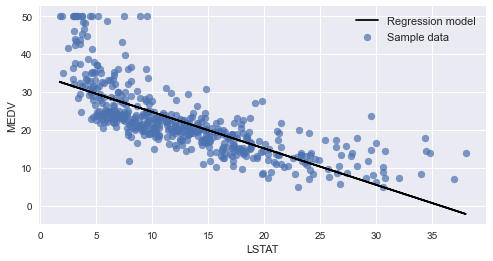

In [83]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Можно рассчитать метрики регрессии для полученной модели. Давайте для примера посчитаем $R^2$:

In [84]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
# R2 score: 0.542

R2 score: 0.542


Итоговый $R^2$ для линейной регрессии, обученной с помощью градиентного спуска, составил 0.542. Напомним, для той же модели, обученной с помощью МНК, метрика была равна 0.544. То есть доля информации, которую объяснила модель, обученная с помощью градиентного спуска, ниже примерно на 0.002. Очевидно, в реальных задачах такая разница не имеет значения. 

Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. Как и раньше составим полную матрицу наблюдений $X$ из всех факторов, которые нам даны. Обучим модель и выведем значения коэффициентов в виде DataFrame:

In [85]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,1.540729e+11
1,ZN,-5.382789e+08
2,INDUS,3.091632e+11
3,CHAS,1.485638e+10
4,NOX,2.393660e+10
5,RM,1.134434e+10
6,AGE,9.343666e+10
7,DIS,-1.241329e+11
8,RAD,2.584134e+11
9,TAX,-3.359744e+11


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

Давайте сделаем предсказание и выведем $R^2$ для обученной модели:

In [86]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: -10590303862129977211224064.000

R2 score: -155407065857466568600977408.000


$R^2$ отрицательный. Да ещё какой! Напомним, отрицательный $R^2$ говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели SGD не справился с поиском 14 параметров (свободный член + 13 коэффициентов при факторах)?

→ Ответ очень простой — отсутствие масштабирования. Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

Давайте стандартизируем наши данные. Воспользуемся классом StandardScaler из модуля preprocessing библиотеки sklearn, который реализует стандартизацию.

In [87]:
from sklearn import preprocessing
 
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


Попытка №2. Обучим модель и составим таблицу из её параметров:



In [88]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


Вот теперь результат более схож с реальностью. Сделаем предсказание и посчитаем результирующий $R^2$:

In [89]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: 0.740

R2 score: 0.740


Теперь метрика имеет приемлемое значение, а значит градиентный спуск смог сойтись.

**Важно!** Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Например, если попытаться сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:

In [90]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

# R2 score: -1856.503

R2 score: -1856.503


У класса SGDRegressor, помимо random_state, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в документации. А мы приведём несколько самых важных:

* loss — функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.  
* max_iter — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
* learning_rate — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее: $\eta_{t} = \frac{\eta_{0}}{t^{p}}$.
Есть ещё несколько режимов управления, о которых вы можете прочитать в документации.

    Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "constant".

* eta0 — начальное значение темпа обучения $\eta_{0}$. Значение по умолчанию — 0.01.
Если параметр learning_rate="constant", то значение этого параметра будет темпом обучения на протяжении всех итераций.

* power_t — значение мощности уменьшения $p$ в формуле $\eta_{t} = \frac{\eta_{0}}{t^{p}}$. Значение по умолчанию — 0.25.

Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

In [91]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

#R2 score: -335415038359.635

R2 score: -335415038359.635


$R^2<0$, то есть SGD разошёлся из-за слишком высокого темпа обучения. 

Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра eta0? Например, 0.000001.

In [92]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
 
# R2 score: -1.578
# warnings.warn("Maximum number of iteration reached before ")

R2 score: -1.578


c:\Users\Home\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


→ Так как модель линейной регрессии является довольно простой и исследованной, то значения параметров, которые обладают наибольшей эффективностью, уже установлены по умолчанию (аргументы по умолчанию), но бывают ситуации, когда поэкспериментировать с параметрами может быть полезно, чтобы попытаться повысить качество.

In [93]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    random_state=42,
    tol=0.1
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
 
# R2 score: -1.578
# warnings.warn("Maximum number of iteration reached before ")

R2 score: 0.735


In [94]:
1e-1

0.1

## СРАВНЕНИЕ АНАЛИТИЧЕСКОГО И ЧИСЛЕННОГО РЕШЕНИЙ

У вас наверняка возник вопрос: что лучше использовать — LinearRegression (аналитическое решение через метод наименьших квадратов) или SGDRegressor (численное решение через стохастический градиентный спуск)?

Приведём сравнение двух реализаций в виде таблицы:

![](pics/2.png)

По приведённой таблице можно выделить примерные области применения каждого из методов:

* Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — LinearRegression, так как МНК обеспечивает простое решение и гарантированную сходимость.
* Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — SGDRegressor с возможностью корректировки параметров на новых данных.

Однако существенной разницы между двумя подходами нет, так как используется одна и та же модель. Наиболее распространённым является классический метод наименьших квадратов (LinearRegression), им в прикладных задачах пользуется большинство дата-сайентистов.

# 5. Дилемма смещения и разброса. Полиномиальные признаки. Регуляризация

✍ Центральной проблемой всего обучения с учителем (не только линейных моделей) является дилемма смещения и разброса модели. Давайте узнаем, что это такое.

До этого момента мы обучали модели на всех имеющихся данных. С одной стороны, это имеет смысл, ведь мы хотим минимизировать ошибки модели, используя как можно больше данных для обучения.

С другой стороны, из-за такого подхода становится труднее оценивать, насколько хорошо работает модель. Причина этого в том, что, если мы продолжим рассчитывать метрики, используя тренировочные данные, мы можем обнаружить, что при применении модели на незнакомых ей данных она работает довольно плохо.

→ Таким образом, модель может детально подстроиться под зависимость в обучающей выборке, но не уловить общей сути.

> Такая проблема называется **переобучением (overfitting)**. По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

> **Недообучение (underfitting)** — проблема, обратная переобучению. Модель из-за своей слабости не уловила никаких закономерностей в данных. В этом случае ошибка будет высокой как для тренировочных данных, так и для данных, не показанных во время обучения.

![](https://lms.skillfactory.ru/assets/courseware/v1/24d0e131092f71d843db3a5fe85cdbf5/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_1.png)



* На первом рисунке изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных.
* На втором рисунке изображена оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени).
* На последнем рисунке изображен полином 27-й степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

С теоретической точки зрения недообучение и переобучение характеризуются понятиями смещения и разброса модели.

> **Смещение (bias)** — это математическое ожидание разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

$$bias(\hat{y}) = M\left [ (y - \hat{y}) \right ]$$

**Примечание**. В зарубежной литературе математическое ожидание часто обозначается как $E$:

$$bias(\hat{y}) = E\left [ (y - \hat{y}) \right ]$$

Чем больше смещение, тем слабее модель. Если модель слабая, она не в состоянии выучить закономерность. Таким образом, налицо недообучение модели.

**Разброс (variance)** — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели.

$$variance(\hat{y}) = D\left [ (y - \hat{y}) \right ]$$

**Примечание**. В зарубежной литературе дисперсия часто обозначается как $Var$:

$$variance(\hat{y}) = Var\left [ (y - \hat{y}) \right ]$$

Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. Наличие высокого разброса и есть свидетельство переобучения: модель подстроилась под конкретный набор данных и даёт высокий разброс ответов на разных данных.

Теоретически на составляющие смещения и разброса модели можно разложить любую функцию потерь. Например, разложение квадратичной ошибки (её математическое ожидание) будет выглядеть следующим образом:

$$M\left[(y-\widehat{y})^{2}\right]=\operatorname{bias}(\hat{y})^{2}+\operatorname{variance}(\hat{y})+\sigma^{2}$$

**Примечание**. Здесь математическое ожидание от квадрата ошибки — это теоретическая аналогия MSE, которую мы с вами рассматривали:

$$M S E=\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{n}$$

Математическое ожидание — это среднее значение во всей генеральной совокупности (на бесконечной выборке), а не на конкретных значениях. Это исключительно теоретическая величина.


Примечание. Вывод формулы — [здесь](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%E2%80%93%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8#%D0%92%D1%8B%D0%B2%D0%BE%D0%B4).

* $\sigma^{2}$ — неустранимая ошибка, вызванная случайностью.
* $bias(\hat{y})^{2}$ — смещение модели (в квадрате).
* $variance(\hat{y})$ — разброс модели.
О чём нам говорит эта теоретическая формула?

Ошибка модели складывается из смещения модели (в квадрате) и её разброса, а также случайной ошибки. 

→ Если с последним слагаемым $\sigma^{2}$ мы ничего не сможем сделать, то вот на первые два (bias и variance) мы можем как-то повлиять. В идеале мы должны свести их к 0. Однако уменьшение одного слагаемого повлечёт увеличение другого. На практике часто приходится балансировать между смещёнными и нестабильными оценками.

[Дилемма смещения-дисперсии](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%E2%80%93%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8) является центральной проблемой в обучении с учителем. В идеале мы хотим построить модель, которая точно описывает зависимости в тренировочных данных и хорошо работает на неизвестных данных. К сожалению, обычно это невозможно сделать одновременно.

Усложняя модель, мы пытаемся уменьшить смещение (bias), однако появляется риск получить переобучение, то есть мы повышаем разброс (variance). 

С другой стороны, снизить разброс (variance) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (bias).

Если провести аналогию, что модель — это игрок в дартс, то самый лучший игрок будет иметь небольшое смещение и разброс: его дротики ложатся кучно «в яблочко». Если у игрока большое смещение, то дротики сгруппированы около другой точки, а если большой разброс — дротики разлетаются по всей мишени.

![](https://lms.skillfactory.ru/assets/courseware/v1/c9e31e930c613a02ef6abd7c363158d6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_2.png)

Интересный факт. По [теореме Гаусса-Маркова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0), оценки линейной регрессии, полученные методом наименьших квадратов, обладают наименьшим разбросом. То есть если существует другая линейная модель, обученная способом, отличным от МНК (например, градиентным спуском), то теорема гарантирует, что эта модель будет обладать большим либо равным разбросом (variance), чем МНК-модель. То есть у линейной регрессии, обученной с помощью МНК, меньше всего риск переобучения. 

Однако это не значит, что его не существует вовсе.

Теперь, когда мы знаем о теоретических основах проблемы переобучения и недообучения, что мы можем сделать, чтобы лучше судить о способности модели к обобщению на практике? Как диагностировать высокие bias и variance?

Типичным решением является разделение данных на две части: обучающий и тестовый наборы. На тренировочном наборе данных мы будем обучать модель, подбирая параметры. Тестовый набор данных, который модель не видела при обучении, мы будем использовать для оценки истинного качества моделирования. Схематично можно представить это следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/6b3371e3f1d290f0c216ac1e826005ff/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_3.png)

Давайте посмотрим, как это работает на практике. Работать будем с уже знакомыми нам данными — данными о домах в Бостоне.

In [95]:
from sklearn.datasets import load_boston 

boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
 
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

В sklearn для разделения выборки на тренировочную и тестовую есть функция train_test_split() из модуля model_selection. Данная функция принимает следующие аргументы:

* X и y — таблица с примерами и ответами к ним.
* random_state — число, на основе которого генерируются случайные числа. Тренировочная и тестовая выборка генерируются случайно. Чтобы эксперимент был воспроизводимым, необходимо установить этот параметр в конкретное значение.
* test_size — доля тестовой выборки. Параметр определяет, в каких пропорциях будет разделена выборка. Стандартные значения: 70/30, 80/20.

Функция возвращает четыре объекта в следующем порядке: тренировочные примеры, тестовые примеры, тренировочные ответы и тестовые ответы. 

Итак, давайте разделим нашу выборку на тренировочную и тес

In [96]:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)
 
# Train: (354, 13) (354,)
# Test: (152, 13) (152,)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


После разделения в тренировочной выборке оказались 354 наблюдения, а в тестовой — 152.

Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем $R^{2}$ для тренировочных и тестовых данных:

In [97]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

# Train R^2: 0.743
# Test R^2: 0.722

Train R^2: 0.743
Test R^2: 0.722


Итак, $R^{2}=0.743$ на тренировочной выборке и $R^{2}=0.722$ на тестовой выборке. То есть показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок).

Это одно из свидетельств отсутствия переобучения. Это не удивительно, ведь линейная регрессия, построенная на 13 факторах, является довольно простой моделью: всего лишь 14 параметров, что очень мало по меркам машинного обучения. Риск переобучения возрастает с количеством факторов, которые участвуют в обучении модели.

Но что насчёт смещения? Самый простой способ оценить смещение и недообученность модели — посмотреть на значение метрики и интуитивно оценить её.

Может, наша модель слишком слабая?  $R^{2}=0.722$ — не слишком уж высокий показатель (напомним, максимум — 1). Возможно, стоит попробовать обучить более сложную модель. Например, можно построить модель **полиномиальной регрессии**.

**Примечание**. Существуют более совершенные визуальные способы оценить наличие смещения и разброса, такие как кривая обучения и кросс-валидация. О них мы ещё поговорим далее в курсе.

# ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ

> **Полиномиальная регрессия (Polynomial Regression)** — это более сложная модель, чем линейная регрессия. Вместо уравнения прямой используется уравнение полинома (многочлена). Степень полинома может быть сколь угодно большой: чем больше степень, тем сложнее модель.

В простом двумерном случае, когда мы рассматриваем зависимость целевого признака от одного фактора, полиномом второй степени будет уравнение параболы:

$$\hat{y} = w_{0} + w_{1}x + w_{2}x^{2}$$

Геометрически полином в двумерном пространстве — это некоторая кривая, которая пытается описать зависимость в данных. Выглядит это следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/01a58ba6150976bb3c408323a9b5fbcf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_5.png)

Когда факторов больше одного, например два, то, помимо возведения фактора в квадрат, появляются ещё и комбинации из $x_1$ и $x_2$:

$$\hat{y}=w_{0}+w_{1} x_{1}+w_{2} x_{2}^{2}+w_{3} x_{2}+w_{4} x^{2}_{2}+w_{5} x_{1} x_{2}$$

Такая модель будет описывать сложную поверхность в трёхмерном пространстве, которая проставлена на рисунке:

![](https://lms.skillfactory.ru/assets/courseware/v1/10616697357bc2252dd39b8fa419ffc0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_6.png)

Заметьте, как быстро растёт количество коэффициентов, а с ним и сложность модели. А ведь это только два фактора — $x_1$ и $x_2$. Мы не будем приводить уравнение для общего случая, как делали это с линейной регрессией, так как оно будет содержать слишком много слагаемых.

Например, рассматривая построенный ранее график зависимости медианной цены домов от процента низкостатусного населения, вы могли заметить, что между данными показателями существует не линейная, а скорее полиномиальная связь.

![](https://lms.skillfactory.ru/assets/courseware/v1/4b02bf0809fb707c3950ce0aa275368e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_7.png)

На рисунке изображены модели линейной и полиномиальной (вторая степень) регрессий.

Заметим, что степени $x$ можно тоже считать своего рода искусственными признаками в данных. Они называются полиномиальными признаками.

Поэтому полиномиальная регрессия — это та же линейная регрессия, просто с новыми признаками. Полиномиальные признаки — один из самых распространённых методов FeatureEngineering.

Пример:

![](https://lms.skillfactory.ru/assets/courseware/v1/c9664ed6fac637130e49aa29ebfb67e9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_8.png)

→ Благодаря степенным слагаемым модель становится сложнее и начинает улавливать более сложные зависимости и выдавать меньшее смещение. Но, как вы понимаете, резко повышается риск переобучения модели — увеличивается разброс предсказаний на разных данных из-за количества факторов.

Давайте проследим за этим.

Построить полиномиальную регрессию в sklearn очень просто. Для начала необходимо создать полиномиальные признаки с помощью объекта класса PolynomialFeatures из модуля preprocessing. Это преобразователь, который позволит сгенерировать полиномиальные признаки любой степени и добавить их в таблицу. У него есть два важных параметра:

* degree — степень полинома. По умолчанию используется степень 2.
* include_bias — включать ли в результирующую таблицу столбец из единиц (x в степени 0). По умолчанию стоит True, но лучше выставить его в значение False, так как столбец из единиц и так добавляется в методе наименьших квадратов.

**Примечание**. Как правило, дата-сайентисты останавливаются на полиноме второй (максимум третьей) степени. Чем выше степень полинома, тем больше слагаемых, а значит, тем больше признаков и тем сложнее становится модель.

Для того чтобы подогнать генератор и рассчитать количество комбинаций степеней, мы используем метод fit(), а чтобы сгенерировать новую таблицу признаков, в которую будут включены полиномиальные признаки, используется метод transform(), в который нужно передать выборки:

In [98]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)
 
# (354, 104)
# (152, 104)

(354, 104)
(152, 104)


Итак, мы сгенерировали новые тренировочные и тестовые наборы данных. В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2.

В результате мы получили два numpy-массива:

In [99]:
print(type(X_train_poly))
print(type(X_test_poly))
# <class 'numpy.ndarray'>
# <class 'numpy.ndarray'>

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Теперь попробуем скормить наши данные модели линейной регрессии, чтобы найти коэффициенты полинома по МНК-алгоритму:

In [100]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

# Train R^2: 0.929
# Test R^2: 0.268

Train R^2: 0.929
Test R^2: 0.268


Потрясающе! На тренировочной выборке коэффициент детерминации $R^{2}=0.929$, то есть наша модель описывает почти 93 % зависимости в данных.

Смотрим на показатели тестовой выборки и сразу «спускаемся с небес на землю»: $R^{2}=0.268$. Метрика значительно ниже, чем на тренировочном наборе. Это и есть переобучение модели. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные, но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

**Примечание**. Модель линейной регрессии может быть неустойчивой, даже если показатели на тренировочной и тестовой выборках довольно близки, однако все коэффициенты уравнения имеют огромные значения.

Такая модель никому не нужна, так как она не отражает действительности.

Однако не стоит расстраиваться — есть один замечательный метод, который сможет спасти нашу модель от переобучения, и это **регуляризация**.

## РЕГУЛЯРИЗАЦИЯ

> **Регуляризация** — способ уменьшения переобучения моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!

Но как можно увеличить смещение модели? Мы можем «наказывать» модель за обучение сложным взаимосвязям. 

Математически это будет очень простая операция — добавление к функции потерь некоторого штрафа.

> **Штраф** — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

Есть несколько способов добавления штрафа к функции потерь:

* **L1-регуляризация (Lasso)** — добавление к функции потерь суммы модулей коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$$L_{1}(w)=M S E+\alpha \sum_{j=1}^{m}\left|w_{j}\right|$$

* **L2-регуляризация (Ridge)**, или регуляризация Тихонова — добавление к функции потерь суммы квадратов коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$$L_{2} (w) = MSE + \alpha \sum_{j=1}^{m} (w_{j})^{2}$$

> **Коэффициенты** $\alpha$ (альфа) — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: чем оно больше , тем сильнее будет штраф за переобучение.

А что по геометрии? Рассмотрим, как будет выглядеть минимум функции потерь в трёхмерном пространстве (вид сверху). Первый метод, $L_{1}(w)$, заставляет искать минимум функции потерь на пересечении его с ромбом, а второй, $L_{2}(w)$, — с окружностью. Визуализация представлена ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/b62125f402f9f7558e5eab24cf3964bd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml2-5_9.png)

На рисунках выше изображено решение задачи поиска минимума функций.

**Для левого рисунка:**

$$L_{1} (w) = \frac{\sum_{i=1}^{n} (y_{i} - w_{0} - w_{1} x_{1})^{2}}{n} + \alpha (\left | w_{0} \right | + \left | w_{1} \right |) \rightarrow min_{w}$$

**Для правого рисунка:**

$$L_{2} (w) = \frac{\sum_{i=1}^{n} (y_{i} - w_{0} - w_{1} x_{1})^{2}}{n} + \alpha ((w_{0})^{2} + (w_{1})^{2}) \rightarrow min_{w}$$

Красными концентрическими кругами (линиями равного уровня) изображена функция потерь $MSE = \frac{\sum_{i=1}^{n} (y_{i} - w_{0} - w_{1} x_{1})^{2}}{n}$. Дополнительное регуляризационное слагаемое $\lambda_{1} = \alpha (\left | w_{0} \right | + \left | w_{1} \right |)$ задаёт уравнение ромба, а слагаемое $\lambda_{2} = \alpha ((w_{0})^{2} + (w_{1})^{2})$ — уравнение окружности.

Таким образом, в результате добавления смещения $\alpha_i$ мы находим не настоящий минимум, а **псевдоминимум**, который лежит на пересечении с ромбом при L1 (окружностью — при L2). Такая оптимизация называется **условной**, или **оптимизацией с ограничениями**. Решение такой задачи строится на основе [метода множителей Лагранжа](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0).

**Примечание**. В реализации sklearn для решения задачи оптимизации используется итеративный алгоритм [координатного спуска](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA) (аналог градиентного спуска, но не использующий производную).

Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов (как в нашей модели выше — 91 фактор). Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

В заключение теоретической части хочется отметить, что на практике никогда не ясно, какой из методов регуляризации сработает лучше всего. Выход — пробовать оба метода и сравнивать результаты.

А теперь пора приниматься за практику!

Практика показывает, что обучение линейной регрессии с большим количеством признаков рекомендуется производить на стандартизованных (нормализованных) данных.

**Примечание**. Часто возникает вопрос: как правильно проводить стандартизацию/нормализацию при наличии тренировочной и тестовой выборки?

Вы обучаете (fit()) преобразование на тренировочной выборке и используете его с одними и теми же параметрами на тренировочной и тестовой выборке (transform()). Если производить подгонку на каждой из выборок в отдельности, вы внесёте смещение в модель.

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

Давайте предобработаем наши данные:

In [101]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
 
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)
# (354, 104)
# (152, 104)

(354, 104)
(152, 104)


→ В sklearn методы регуляризации реализованы в классах Lasso (L1-регуляризация) и Ridge (L2-регуляризация). Оба метода осуществляют поиск параметров с добавлением регуляризации. Процесс обучения и предсказания не отличается от обычной линейной регрессии.

Давайте построим модель линейной регрессии с L1-регуляризацией на сгенерированных нами ранее полиномиальных признаках.

Главный параметр инициализации Lasso — это alpha, коэффициент регуляризации. По умолчанию alpha=1. Практика показывает, что это довольно сильная регуляризация для L1-метода. Давайте установим значение этого параметра на 0.1.

In [102]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

# Train R^2: 0.879
# Test R^2: 0.882

Train R^2: 0.879
Test R^2: 0.882


Обратите внимание на то, как изменились значения метрик. Да, на тренировочной выборке $R^{2}=0.879$. Метрика упала (до стандартизации + регуляризации значение $R^2$ было $0.929$). Однако метрика ощутимо выросла на тестовой выборке: $R^{2}=0.882$ (ранее она была равна $0.268$). Мы смогли преодолеть переобучение.

Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [103]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


Обратите внимание: большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

Теперь давайте на тех же данных обучим модель линейной регрессии с L2-регуляризацией. Для L2-регуляризации параметр alpha по умолчанию равен 1. Давайте попробуем использовать значение параметра alpha=10:

In [104]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))
 

# Train R^2: 0.907
# Test R^2: 0.831

Train R^2: 0.907
Test R^2: 0.848


Значения метрики $R^2$ на тренировочной и тестовой выборках для L2-регуляризации получились немного выше. В первую очередь мы всегда ориентируемся на тестовую выборку — это данные, которые модель ещё не видела.

Давайте выведем значения коэффициентов модели, округлив их до третьего знака после запятой:

In [105]:
print(np.round(ridge_lr_poly.coef_, 3))


[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


Давайте организуем процесс перебора параметров модели: создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. Такой список проще всего создать с помощью функции linspace() из библиотеки numpy.

В цикле будем обучать модель линейной регрессии и L1-регуляризацией (Lasso), вычислять значения метрики $R^2$ на тренировочной и тестовой выборках и заносить результаты в списки train_scores и test_scores:

In [106]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

В результате выполнения данного кода в списках train_scores и test_scores появятся 20 различных значений $R^2$ на тренировочной и тестовой выборках.

Давайте построим линейные графики, которые покажут, как меняется метрика $R^2$ на тренировочной и тестовой выборках в зависимости от alpha:

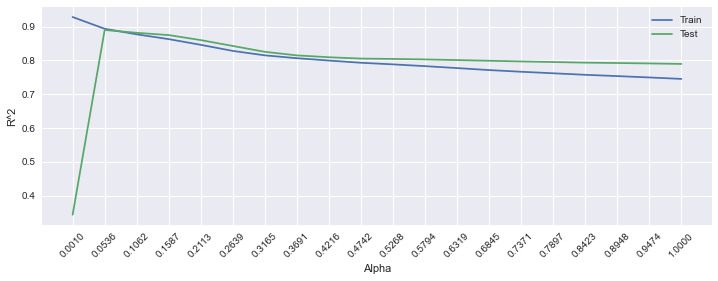

In [107]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

С помощью графика мы можем подобрать оптимальное значение параметра alpha. Нам нужна такая точка на оси абсцисс, при которой на тестовой выборке наблюдается максимальная метрика и при этом разница между метриками на тренировочной и тестовой выборках минимальна.

Видно, что $R^2$ на тестовой выборке достигает наибольшего значения в точке 0.0536. Причём в этой точке наблюдается примерное равенство метрик на каждом наборе данных. Далее метрика на тестовой выборке начинает падать.

Обратите внимание, что на тренировочной выборке $R^2$ непрерывно падает с ростом alpha. Оно и понятно, ведь чем больше alpha, тем сильнее регуляризация и тем меньше модель подстраивается под обучающую выборку.

Давайте подставим значение alpha=0.0536 в модель Lasso и получим результат:

In [108]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

# Train R^2: 0.894
# Test R^2: 0.890

Train R^2: 0.894
Test R^2: 0.890


Итак, метрика $R^2$ выросла благодаря тому, что мы смогли подобрать оптимальное значение параметра alpha.

**Примечание**. Помимо основных методов регуляризации L1 и L2, существует комплексный метод.

> **Эластичная сетка (Elastic Net)** — это комбинация из двух методов регуляризации. Функция потерь в таком методе выглядит следующим образом:

$$L_{2}(w)=M S E+\alpha \cdot \lambda \sum_{i=1}^{m}\left|w_{i}\right|+\alpha \cdot(1-\lambda) \sum_{i=1}^{m}\left(w_{i}\right)^{2} \rightarrow \min _{w}$$

В sklearn реализация эластичной сетки находится в объекте класса [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).

Параметры  и  позволяют регулировать вклад L1- и L2-регуляризации. На практике данный метод используется гораздо реже, так как нужно подбирать оптимальную комбинацию из двух параметров.

**Примечание**. Регуляризация присутствует и в модели SGDRegressor, причём она используется по умолчанию. В инициализаторе данного класса есть параметр penalty, который позволяет управлять методом регуляризации. Параметр может принимать значения 'l1', 'l2' и 'elasticnet'. По умолчанию используется L2-регуляризация (penalty='l2'). Коэффициент регуляризации (alpha) по умолчанию равен 0.0001 (относительно слабая регуляризация). Управляя двумя этими параметрами, вы можете настраивать тип регуляризации в SGD-методе и её «силу».

✍ В этом юните мы:

* рассмотрели понятия переобучения и недообучения и связанные с ними смещение (bias) и разброс (variance);
* научились генерировать полиномиальные признаки и обучать модель линейной регрессии на этих признаках;
* познакомились с основными методами регуляризации и их реализациями в sklearn;
* научились подбирать внешний параметр (коэффициент регуляризации alpha) на основе значений на тестовой выборке.

# 6. Линейная регрессия. Практика

✍ Настало время попрактиковаться применять модель линейной регрессии и её модификации в задачах регрессии.

В этот раз мы коснёмся мира медицинского страхования. Нашей целью будет предсказать индивидуальные медицинские расходы граждан США, оплачиваемые медицинской страховкой.

Работать будем с популярным датасетом [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance).

[→ Скачайте файл с данными](https://lms.skillfactory.ru/assets/courseware/v1/12aeb6a8af2d5cdf500e55d3ccbb9f8e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/insurance.zip)

Необходимые нам библиотеки:

In [109]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

Прочитаем данные:

In [110]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела ($кг/м^2$), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

Размер таблицы:

In [111]:
print(data.shape)
# (1338, 7)

(1338, 7)


Выведем информацию о пропусках, так как наличие пропусков не позволит нам построить модель линейной регрессии:

In [112]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропуски в таблице отсутствуют.

Посмотрим на типы данных:

In [113]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).
Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [114]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Итак, мы получили перекодированную таблицу, в которой все признаки являются числовыми.

Выделим факторы и целевой признак в отдельные таблицы:

In [115]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

Теперь мы можем начинать работу над моделью ↓

### Задание 6.1

Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [116]:
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (1070, 9) (1070,)
Test: (268, 9) (268,)


### Задание 6.2

Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [117]:
#Создаём объект класса LinearRegression
lr = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr.fit(X_train, y_train)
 
print('w0: {:.2f}'.format(lr_lstat.intercept_)) #свободный член w0
# print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
## w1: [-0.95004935]

w0: 34.55


### Задание 6.3

С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: $R^2$, $MAE$, $MAPE$. Не забудьте привести значение $MAPE$ к процентам.

Значение $R^2$ округлите до трёх знаков после точки-разделителя, а значения $MAE$ и $MAPE$ — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [118]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [121]:
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Train MAPE: 47


### Задание 6.4

Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием: $y-\hat{y}$ (без модуля).

Выберите верные ответы:

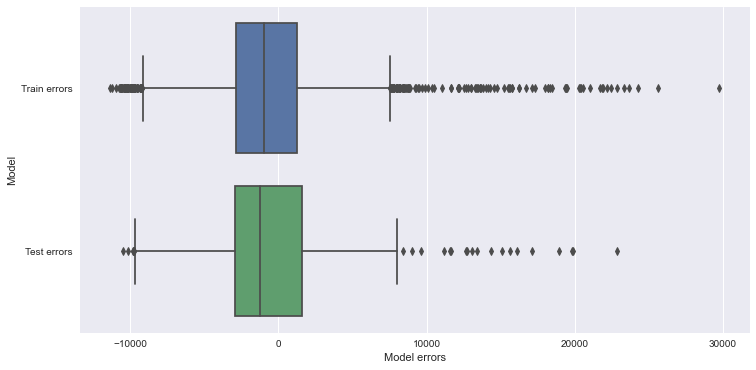

In [123]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - lr.predict(X_train)
#Ошибки модели на тестовой выборке
y_test_errors = y_test - lr.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

### Задание 6.5

Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

**Примечание**. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

In [124]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


### Задание 6.6

Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики $R^2$ на тестовой выборке?

Значение $R^2$ округлите до трёх знаков после запятой.

In [125]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2900
Train MAPE: 30


Test R^2: 0.867
Test MAE: 2732
Train MAPE: 30


### Задание 6.7

Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [126]:
print(lr_poly.coef_)


[-1.72324070e+16  1.31146740e+16 -6.07518911e+15  8.68217520e+15
 -1.01570042e+16 -4.74066016e+16 -1.33580061e+17 -3.47106940e+16
 -7.38096689e+16  8.48000000e+03  8.98000000e+02  8.58000000e+02
 -1.57800000e+03  2.32000000e+02  1.72324070e+16  1.72324070e+16
  1.72324070e+16  1.72324070e+16  9.88117370e+16  7.42000000e+02
 -1.29393750e+03  2.14312500e+02 -1.11926411e+17 -1.11926411e+17
 -1.11926411e+17 -1.11926411e+17 -9.42390625e+03  1.74862500e+03
  5.47891016e+04  6.07518911e+15  6.07518911e+15  6.07518911e+15
  6.07518911e+15 -1.98400000e+03 -2.28000000e+03 -8.68217520e+15
 -8.68217520e+15 -8.68217520e+15 -8.68217520e+15  4.62270002e+15
  5.53430414e+15  5.53430414e+15  5.53430414e+15  5.53430414e+15
 -3.72415148e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.89319446e+16  0.00000000e+00  0.00000000e+00 -4.99374223e+16
  0.00000000e+00 -1.08384475e+16]


### Задание 6.8

Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики $R^2$, $MAE$ и $MAPE$ на тестовой выборке?

Значение $R^2$ округлите до трёх знаков после запятой, а значения $MAE$ и $MAPE$ до целого числа.

In [129]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)
# Train R^2: 0.894
# Test R^2: 0.890

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Train MAPE: 30


### Задание 6.9

Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики $R^2$, $MAE$ и $MAPE$ на тестовой выборке?

Значение $R^2$ округлите до трёх знаков после запятой, а значения $MAE$ и $MAPE$ до целого числа.

In [130]:
#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = ridge_lr.predict(X_train_scaled_poly)
y_test_pred = ridge_lr.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Train MAPE: 31


⭐ Поздравляем! Вы познакомились со своими первыми моделями машинного обучения!

Напоследок ещё раз обсудим, **что мы сделали в модуле:**

* узнали, что такое модель линейной регрессии;
* изучили несколько методов поиска параметров этой модели, реализованных в sklearn: метод наименьших квадратов (LinearRegression) и стохастический градиентный спуск (SGDRegressor);
* выявили достоинства и недостатки каждого из методов;
* научились делать предсказание с помощью модели линейной регрессии;
* познакомились с метриками регрессии и научились измерять качество регрессионной модели;
* узнали о центральной проблеме обучения с учителем – дилемме смещения и разброса, научились определять переобученность модели;
* научились строить полиномиальную регрессию и бороться с переобучением с помощью регуляризации.

**Методы решения задачи регрессии, которые мы рассмотрели в модуле:**

* LinearRegression и SGDRegressor — модели линейной регрессии с аналитическим и численным решением;
* PolynomialFeatures + LinearRegression — модель полиномиальной регрессии (или линейная регрессия на полиномиальных признаках);
* Lasso и Ridge — модели линейной регрессии с L1- и L2-регуляризацией соответственно.

Стоит отметить, что, помимо рассмотренных, существует ещё множество методов решения задачи регрессии, с которыми мы будем знакомиться дальше.

**ДОПОЛНИТЕЛЬНО:**

[Десять датасетов для практики работы с линейной регрессией](https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression)  
[Базовые принципы машинного обучения на примере линейной регрессии](https://habr.com/ru/company/ods/blog/322076/)  
[Регрессионные модели в Python](https://nagornyy.me/it/regressionnye-modeli-v-python/)